In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('test.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [5]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [6]:
data = data.fillna(data.median())

In [7]:
data.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [8]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

In [9]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [10]:
data = data.drop('Loan_ID' , axis = 1)

In [11]:
data['Total_Income'] = data['ApplicantIncome']+data['ApplicantIncome']

In [12]:
data = pd.get_dummies(data=data , columns = ['Gender','Married', 'Dependents', 'Education',
                                             'Self_Employed','Property_Area','Credit_History'] , drop_first = True )

<AxesSubplot:>

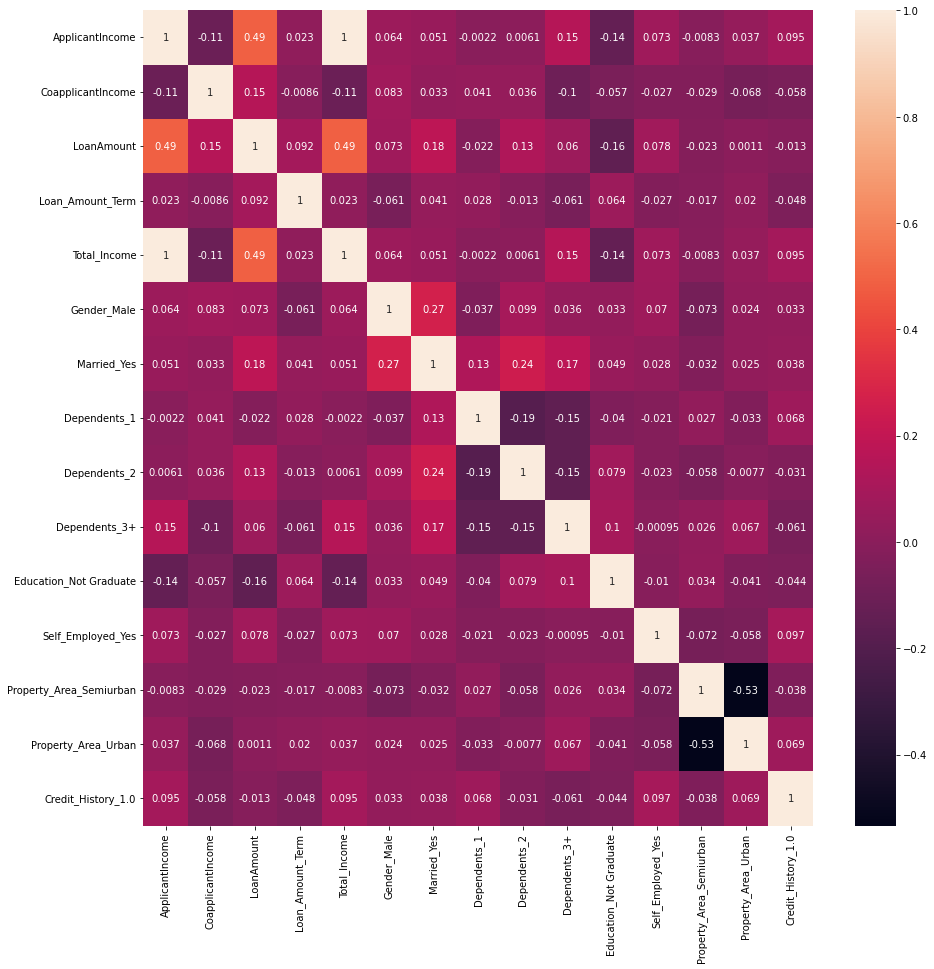

In [13]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr() , annot = True)

In [14]:
data = data.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'],axis =1)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaled = StandardScaler()

In [17]:
data= scaled.fit_transform(data)

In [18]:
data = pd.DataFrame(data = data , columns = ['Total_Income', 'Gender_Male', 'Married_Yes', 'Dependents_1',
      'Dependents_2', 'Dependents_3+', 'Education_Not Graduate',
      'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_1.0'])

In [19]:
data.head()

,Total_Income,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Credit_History_1.0
0,0.186461,0.485479,0.758358,-0.433246,-0.437674,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
1,-0.352692,0.485479,0.758358,2.308156,-0.437674,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
2,0.039641,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
3,-0.502774,0.485479,0.758358,-0.433246,2.284806,-0.349749,-0.544812,-0.334845,-0.679817,1.273353,0.437674
4,-0.311909,0.485479,-1.318638,-0.433246,-0.437674,-0.349749,1.835497,-0.334845,-0.679817,1.273353,0.437674


In [20]:
data = data.to_csv('test_data.csv')